In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013/test/surprise/PublicTest_78686873.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_58522921.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_83796714.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_84428313.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_87978901.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_90978621.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_27580582.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_15760011.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_49739228.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_5351857.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_56096676.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_71692098.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_64532931.jpg
/kaggle/input/fer2013/test/surprise/PublicTest_17886908.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_21410542.jpg
/kaggle/input/fer2013/test/surprise/PrivateTest_68745885.jpg
/kaggle/input/fer2013/test/surpr

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

2024-03-17 06:19:01.289588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 06:19:01.289686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 06:19:01.428261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir ='/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'


In [4]:
import os
for dirpath,dirname,filenames in os.walk('/kaggle/input/fer2013'):
    print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in /kaggle/input/fer2013
There are 7 directories and 0 images in /kaggle/input/fer2013/test
There are 0 directories and 831 images in /kaggle/input/fer2013/test/surprise
There are 0 directories and 1024 images in /kaggle/input/fer2013/test/fear
There are 0 directories and 958 images in /kaggle/input/fer2013/test/angry
There are 0 directories and 1233 images in /kaggle/input/fer2013/test/neutral
There are 0 directories and 1247 images in /kaggle/input/fer2013/test/sad
There are 0 directories and 111 images in /kaggle/input/fer2013/test/disgust
There are 0 directories and 1774 images in /kaggle/input/fer2013/test/happy
There are 7 directories and 0 images in /kaggle/input/fer2013/train
There are 0 directories and 3171 images in /kaggle/input/fer2013/train/surprise
There are 0 directories and 4097 images in /kaggle/input/fer2013/train/fear
There are 0 directories and 3995 images in /kaggle/input/fer2013/train/angry
There are 0 directories and 4965 imag

(-0.5, 47.5, 47.5, -0.5)

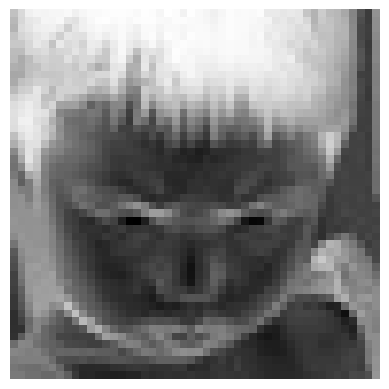

In [5]:
# Let's look at some images
from matplotlib.pyplot import imread
img = imread('/kaggle/input/fer2013/train/angry/Training_10118481.jpg')
plt.imshow(img,'binary')
plt.axis(False)

In [6]:
train_data_gen=ImageDataGenerator(rescale=1./255)
validation_data_gen=ImageDataGenerator(rescale=1./255)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='training')
validation_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
from keras.optimizers import Adam,SGD,RMSprop

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [10]:
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 10),
                ModelCheckpoint(
                    filepath='model.weights.best.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

In [12]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size

history = model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=40,
                 callbacks=[checkpointer],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/40


2024-03-17 06:20:11.887545: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1710656415.643974     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


358/358 [==============================] - ETA: 0s - loss: 1.7958 - accuracy: 0.3062
Epoch 1: val_accuracy improved from -inf to 0.19944, saving model to model.weights.best.hdf5
358/358 [==============================] - 96s 244ms/step - loss: 1.7958 - accuracy: 0.3062 - val_loss: 1.8888 - val_accuracy: 0.1994
Epoch 2/40


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


358/358 [==============================] - ETA: 0s - loss: 1.4411 - accuracy: 0.4434
Epoch 2: val_accuracy improved from 0.19944 to 0.46436, saving model to model.weights.best.hdf5
358/358 [==============================] - 24s 67ms/step - loss: 1.4411 - accuracy: 0.4434 - val_loss: 1.3850 - val_accuracy: 0.4644
Epoch 3/40
357/358 [============================>.] - ETA: 0s - loss: 1.2975 - accuracy: 0.5043
Epoch 3: val_accuracy did not improve from 0.46436
358/358 [==============================] - 24s 68ms/step - loss: 1.2975 - accuracy: 0.5044 - val_loss: 1.4735 - val_accuracy: 0.4157
Epoch 4/40
357/358 [============================>.] - ETA: 0s - loss: 1.2186 - accuracy: 0.5357
Epoch 4: val_accuracy improved from 0.46436 to 0.47753, saving model to model.weights.best.hdf5
358/358 [==============================] - 22s 62ms/step - loss: 1.2192 - accuracy: 0.5355 - val_loss: 1.3304 - val_accuracy: 0.4775
Epoch 5/40
358/358 [==============================] - ETA: 0s - loss: 1.1723 - ac

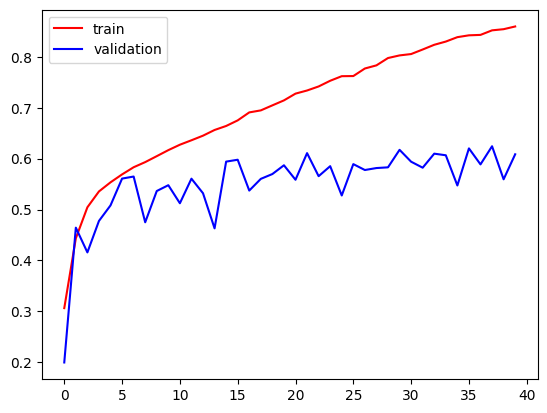

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

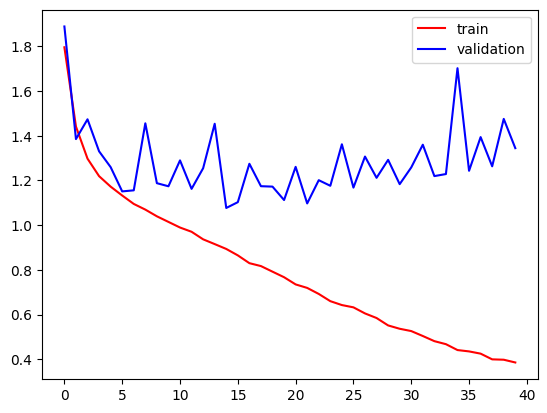

In [14]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# saving the model
model.save("fer_model.h5")

# Test Accuracy

In [16]:
print(f"Test accuracy = {model.evaluate(test_set ,batch_size=test_set.batch_size,steps=test_set.n // test_set.batch_size)[1]*100}%")

112/112 [==============================] - 22s 194ms/step - loss: 1.2958 - accuracy: 0.6286
Test accuracy = 62.86272406578064%


# Confusion Matrix

#### Confusion matrix on Training Set

359/359 [==============================] - 20s 54ms/step
Confusion Matrix
[[ 432   45  411  790  607  536  375]
 [  43    2   50   81   73   57   43]
 [ 422   37  475  830  620  531  363]
 [ 754   83  859 1376 1143  924  633]
 [ 555   73  582  950  737  636  439]
 [ 537   71  538  944  720  614  440]
 [ 348   30  359  644  453  414  289]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3196
     disgust       0.01      0.01      0.01       349
        fear       0.15      0.14      0.14      3278
       happy       0.25      0.24      0.24      5772
     neutral       0.17      0.19      0.18      3972
         sad       0.17      0.16      0.16      3864
    surprise       0.11      0.11      0.11      2537

    accuracy                           0.17     22968
   macro avg       0.14      0.14      0.14     22968
weighted avg       0.17      0.17      0.17     22968



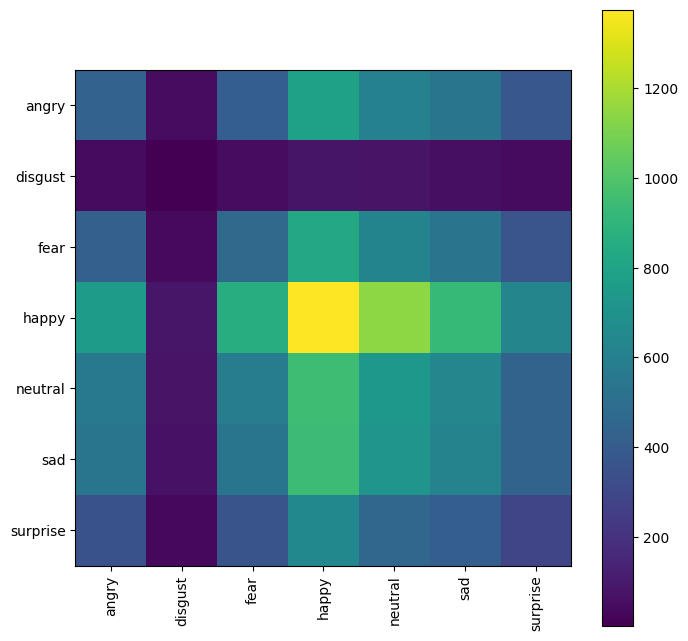

In [17]:
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))
plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

#### Confusion Matrix on Validation Dataset

90/90 [==============================] - 5s 55ms/step
Confusion Matrix
[[101   9  99 178 199 123  90]
 [ 15   2   6  14  26  13  11]
 [102   9 127 190 172 144  75]
 [173   9 192 311 346 243 169]
 [119   9 125 246 215 162 117]
 [110   9 131 222 220 164 110]
 [ 63   3  85 150 143 112  78]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.13      0.14       799
     disgust       0.04      0.02      0.03        87
        fear       0.17      0.16      0.16       819
       happy       0.24      0.22      0.23      1443
     neutral       0.16      0.22      0.19       993
         sad       0.17      0.17      0.17       966
    surprise       0.12      0.12      0.12       634

    accuracy                           0.17      5741
   macro avg       0.15      0.15      0.15      5741
weighted avg       0.17      0.17      0.17      5741



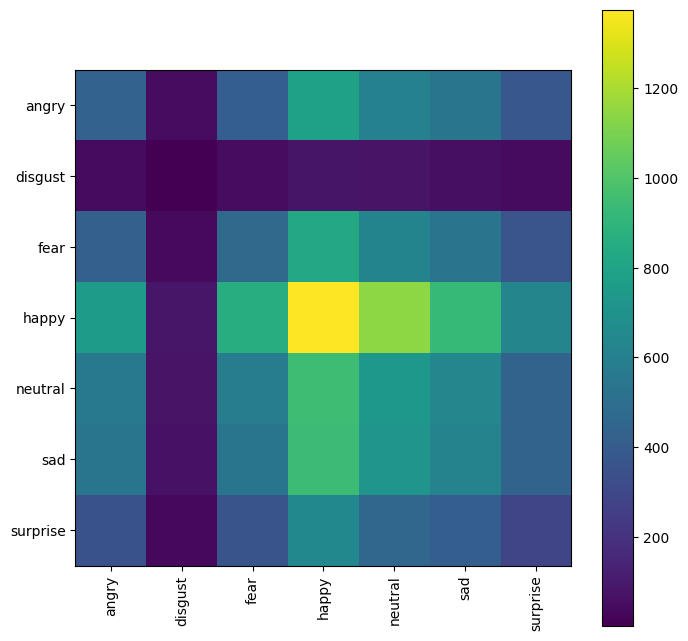

In [18]:
y_pred = model.predict(validation_set)
y_pred = np.argmax(y_pred, axis=1)
cm_val = confusion_matrix(validation_set.classes, y_pred)
print('Confusion Matrix')
print(cm_val)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_set.classes, y_pred, target_names=target_names))


plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

#### Confusion Matrix on Test Dataset

113/113 [==============================] - 6s 55ms/step
Confusion Matrix
[[114  11 122 219 207 165 120]
 [  9   1  21  26  24  18  12]
 [110  11 133 246 250 163 111]
 [227  11 219 415 398 298 206]
 [151   8 172 273 274 204 151]
 [149  13 178 274 280 205 148]
 [111  14 102 191 184 135  94]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.12      0.12       958
     disgust       0.01      0.01      0.01       111
        fear       0.14      0.13      0.13      1024
       happy       0.25      0.23      0.24      1774
     neutral       0.17      0.22      0.19      1233
         sad       0.17      0.16      0.17      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



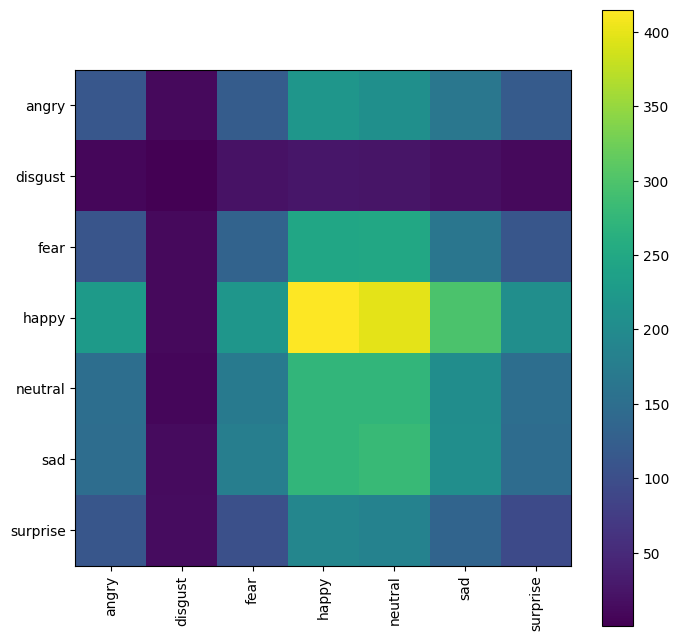

In [19]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

# Plotting predections

In [20]:
# next function assigns one batch to variables, i.e x_test,y_test will have 64 images
x_test,y_test = next(test_set)
predict = model.predict(x_test)

2/2 [==============================] - 1s 5ms/step


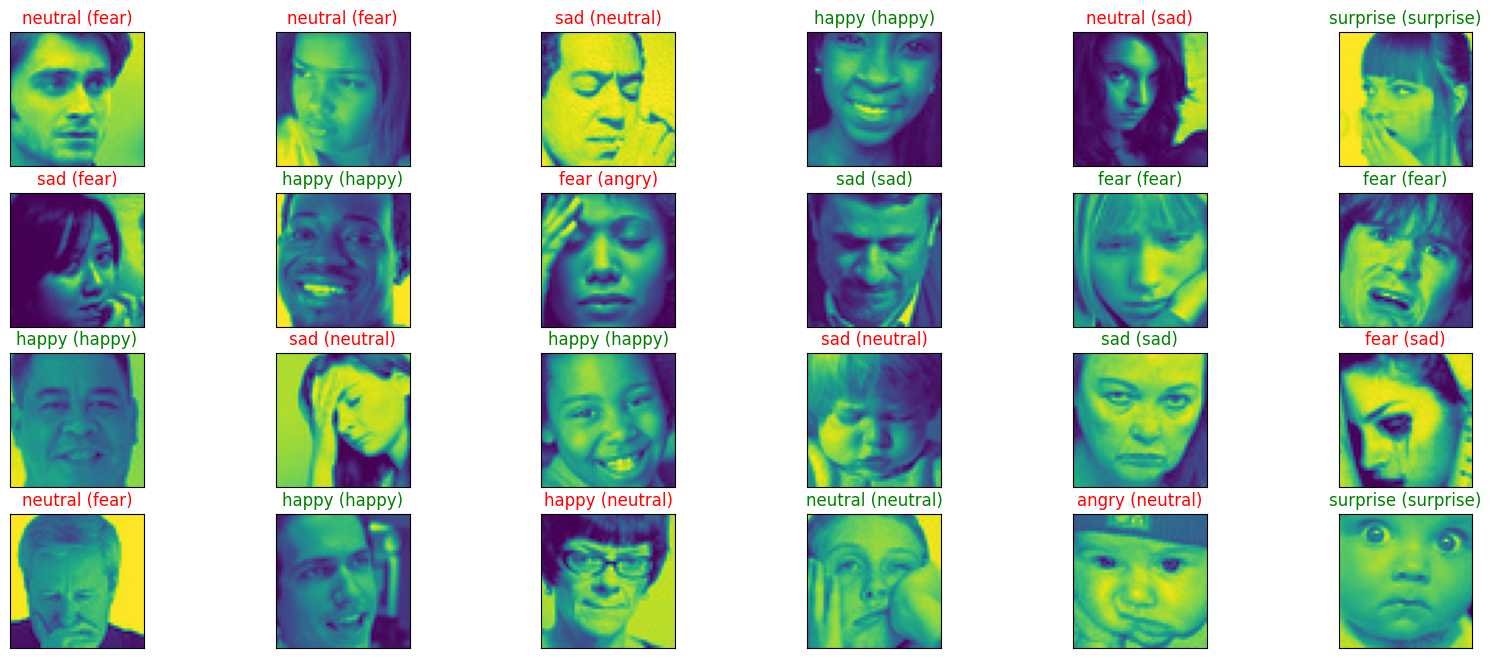

In [21]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = class_labels[(np.argmax(predict[index]))]
    true_index = class_labels[(np.argmax(y_test[index]))]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))